# Lecture 06: Majorization-Minimization and Expectation Maximization

## Majorization-Minimization

We say that a function $g:\mathbb{R}^d\times\mathbb{R}^d\rightarrow\mathbb{R}$ **majorizes** a function $f:\mathbb{R}^d\rightarrow\mathbb{R}$ if

1. $g({\bf x}, {\bf x}^\prime)\geq f({\bf x})$ for all ${\bf x}, {\bf x}^\prime\in \mathbb{R}^d$, and
2. $g({\bf x}^\prime, {\bf x}^\prime)=f({\bf x}^\prime)$ for all ${\bf x}^\prime\in \mathbb{R}^d$.

Whenever we have a majorization relationship, we can define a **majorization-minimization** optimization procedure by intializing ${\bf x}^{(0)}$ and computing the sequence

$$
{\bf x}^{(k+1)} = \arg\min_{\bf x} g({\bf x}, {\bf x}^{(k)}).
$$

We then have that

$$
f({\bf x}^{(k+1)})\leq g({\bf x}^{(k+1)}, {\bf x}^{(k)})\leq g({\bf x}^{(k)}, {\bf x}^{(k)})=f({\bf x}^{(k)})
$$

and it follows from the transitive property that $f({\bf x}^{(k)})$ is a monotonically decreasing sequence of values.

### Example:

Let $f(x)=x\arctan(x)-\log(1+x^2)/2$. Then

$$
g(x,x^\prime) = f(x^\prime) + \arctan(x^\prime)(x-x^\prime) + \frac{1}{2}(x-x^\prime)^2
$$

majorizes $f$. It is easy to see that $g(x^\prime,x^\prime)=f(x^\prime)$ for all $x^\prime$. On the other hand, Taylor's theorem gives a $\xi$ between $x$ and $x^\prime$ such that

$$
f(x) = f(x^\prime) + f^\prime(x^\prime)(x-x^\prime) + \frac{1}{2} f^{\prime\prime}(\xi)(x-x^\prime)^2=f(x^\prime) + \arctan(x^\prime)(x-x^\prime) + \frac{1}{2} \frac{1}{1+\xi^2}(x-x^\prime)^2\leq f(x^\prime) + \arctan(x^\prime)(x-x^\prime) + \frac{1}{2} (x-x^\prime)^2 = g(x,x^\prime).
$$

Noting that $g(x,x^\prime)$ is convex as a function of $x$, we have that $0=\frac{d}{dx} g(x, x^\prime) = \arctan(x^\prime) + (x-x^\prime)$ is necessary and sufficient for optimality. Thus, $x = x^\prime - \arctan(x^\prime)$ is the only minimizer of $g(x, x^\prime)$, so the iterates in majorization-minimization will be

$$
x^{(k+1)} = x^{(k)} - \arctan(x^{(k)}).
$$

## A Large Class of Examples


Based on the reasoning in this example, if $f\in C^2(\mathbb{R})$ with $\vert f^{\prime\prime}(x)\vert\leq C$ for all $x\in\mathbb{R}$, we have that

$$
g(x,x^\prime) = f(x^\prime) + f^\prime(x^\prime)(x-x^\prime) + \frac{C}{2}(x-x^\prime)^2.
$$



The generalization to higher dimensions requires us to define the **operator** or **spectral** norm of a square matrix:

$$
\Vert A\Vert_{\text{op}} = \min_{\Vert {\bf u}\Vert=1} {\bf u}^T A {\bf u}.
$$

We then get that, if $f\in C^2(\mathbb{R}^d)$ and $\Vert \nabla^2 f({\bf x})\Vert_{\text{op}}\leq C$ for all ${\bf x}\in\mathbb{R}^d$, then 

$$
g({\bf x}, {\bf x}^\prime)= f({\bf x}^\prime) + \nabla f({\bf x}^\prime)^T({\bf x}-{\bf x}^\prime) + \frac{C}{2}\Vert {\bf x}-{\bf x}^\prime\Vert^2.
$$

The reason we get this generalization is that Taylor's theorem extends to higher dimensions. In particular, for $f\in C^2(\mathbb{R}^d)$, there is a $\xi$ on the *line segment connecting* ${\bf x}$ and ${\bf x}^\prime$ with

$$
f({\bf x}) = f({\bf x}^\prime) + \nabla f({\bf x}^\prime)^T({\bf x}-{\bf x}^\prime) + \frac{1}{2}({\bf x}-{\bf x}^\prime)^T\nabla^2 f(\xi)({\bf x}-{\bf x}^\prime).
$$


## Expectation-Maximization

Expectation-Maximization is a technique for fitting **latent mixture models** using (essentially) majorization minimization.

### Latent mixture models

A latent mixture model is a random variable $X$ whose probability density function has the form

$$
p(X=x) = \sum_{i=1}^k p(X=x, C=i).
$$

That is, the density function is a marginal of a joint probability density over random variables $X$ and $C$, where $C$ takes values in the finite set $\{1,\ldots, k\}$. We call $C$ the **latent variable** because it is generally never observed. Using the multiplicative law of probability, we have

$$
p(X=x) = \sum_{i=1}^k p(X=x\vert C=i) p(C=i),
$$

which tells us that $p(X=x)$ is a weighted mixture of the conditional densities $p(X=x\vert C=i)$, with weights given by $p(C=i)$. It therefore makes sense to call this a *latent mixture model*.

This representation of $p(X)$ also indicates that $X$ can be generated in a *hierarchical manner*:

1. Draw $c$ according to the density $p(C)$
2. Draw $X$ according to the conditional density $p(X\vert C=c)$

### Fitting parametric latent mixture models

**Density estimation** seeks to estimate the true density of a random variable $X$. That is, we are given data $\{ X_n\}_{n=1}^N$ and we use this to estimate $\widehat{p}(X)$ which is suitably close to the true density $p(X)$. One way to do this is by setting up a **parameteric latent mixture model**. To do this we restrict our estimate to densities of the form

$$
p(X=x; \theta_1,\ldots, \theta_k) = \sum_{i=1}^k p(X=x;\theta_i)p(C=i)
$$

where $p(X=x;\theta)$ is a density that depends on the parameter $\theta$, and $k$ is a fixed hyperparameter. For example, we could use the Gaussian parametric family

$$
p(X=x; \theta) = \frac{1}{\sqrt{2\pi}} e^{-(x-\theta)^2/2}\text{ for }\theta\in\mathbb{R}
$$

and then

$$
p(X=x; \theta_1,\ldots, \theta_k) = \sum_{i=1}^k \frac{1}{\sqrt{2\pi}} e^{-(x-\theta_i)^2/2}p(C=i).
$$

Now, we also don't know $\alpha_i=p(C=i)$, so this must be estimated as well. Thus, a simple **Gaussian mixture model** would look like

$$
p(X=x; \theta_1,\ldots, \theta_k,\alpha_1,\ldots,\alpha_k) = \sum_{i=1}^k \frac{\alpha_i}{\sqrt{2\pi}} e^{-(x-\theta_i)^2/2}.
$$

where $\theta_i,\alpha_i\in \mathbb{R}$, $\alpha_i\geq0$, and $\sum_{i=1}^k\alpha_i=1$. 

A more flexible Gaussian mixture model would allow us to also fit the variance inside of the *mixture components*. Thus, the general Gaussian mixture model for a 1D random variable is given by

$$
p(X=x; \mu_1,\ldots, \mu_k,\sigma_1,\ldots,\sigma_k,\alpha_1,\ldots,\alpha_k) = \sum_{i=1}^k \frac{\alpha_i}{\sqrt{2\pi\sigma_i^2}} e^{-\frac{1}{2\sigma_i^2}(x-\mu_i)^2}.
$$

where $\mu_i,\sigma_i,\alpha_i\in\mathbb{R}$, $\sigma_i>0$, $\alpha_i\geq 0$, and $\sum_{i=1}^k\alpha_i=1$.

In particular, if we wanted to try to approximate a *bimodal distribution*, we might try to fit

$$
p(X=x;\mu_1,\mu_2,\sigma_1,\sigma_2,\alpha_1,\alpha_2)= \alpha_1 p(X=x;\mu_1,\sigma_1) + \alpha_2 p(X-x;\mu_2,\sigma_2)=\frac{\alpha_1}{\sqrt{2\pi\sigma_1^2}}e^{-\frac{1}{2\sigma_1^2}(x-\mu_1)^2} + \frac{\alpha_2}{\sqrt{2\pi\sigma_2^2}}e^{-\frac{1}{2\sigma_2^2}(x-\mu_2)^2}
$$

to a dataset $\{x_n\}_{n=1}^N$.

### Maximum likelihood for parameter estimation in the two-component Gaussian mixture model

The most straightforward way to fit this parametric model to data is to form a likelihood to maximize:

$$
\mathcal{L}(\mu_1,\mu_2,\sigma_1,\sigma_2,\alpha_1,\alpha_2) = \prod_{n=1}^N p(X=x_n;\mu_1,\mu_2,\sigma_1,\sigma_2,\alpha_1,\alpha_2).
$$

This is converted to a negative log-likelihood 

$$
\ell(\mu_1,\mu_2,\sigma_1,\sigma_2,\alpha_1,\alpha_2) = -\sum_{n=1}^N\log p(X=x_n;\mu_1,\mu_2,\sigma_1,\sigma_2,\alpha_1,\alpha_2)= -\sum_{n=1}^N\log \left(\alpha_1p(X=x_n;\mu_1,\sigma_1) + \alpha_2 p(X=x_n;\mu_2,\sigma_2)\right)
$$

To find a function which majorizes this sum, we first find a function $g_x(\theta,\theta^\prime)$ which majorizes
$$
f_x(\theta)=-\log\left(\alpha_1p(X=x;\mu_1,\sigma_1) + \alpha_2 p(X=x;\mu_2,\sigma_2)\right)
$$
where
$$
\theta = (\mu_1,\mu_2,\sigma_1,\sigma_2,\alpha_1,\alpha_2)
$$
and
$$
\theta^\prime = (\mu_1^\prime,\mu_2^\prime,\sigma_1^\prime,\sigma_2^\prime,\alpha_1^\prime,\alpha_2^\prime).
$$
We would then have that $\ell(\theta)=\sum_{n=1}^N f_{x_i}(\theta)$ is majorized by $g_{x_i}(\theta,\theta^\prime)$.

We set
$$
q_i(\theta) = \alpha_i p(X=x;\mu_i,\sigma_i)
$$
for $i=1,2$. We claim that
$$
g_x(\theta, \theta^\prime) = -\frac{q_1(\theta^\prime)}{q_1(\theta^\prime)+q_2(\theta^\prime)}\log\left(\frac{q_1(\theta)}{q_1(\theta^\prime)}(q_1(\theta^\prime)+q_2(\theta^\prime))\right) -\frac{q_2(\theta^\prime)}{q_1(\theta^\prime)+q_2(\theta^\prime)}\log\left(\frac{q_2(\theta)}{q_2(\theta^\prime)}(q_1(\theta^\prime)+q_2(\theta^\prime))\right)
$$
majorizes $f_x(\theta)$. To simplify a little further, we note that
$$
\frac{q_i(\theta^\prime)}{q_1(\theta^\prime)+q_2(\theta^\prime)}
$$
is the conditional probility of that $x$ was drawn from component $i$, $p(C=i\vert X=x;\theta^\prime)$. In particular, $p(C=1\vert X=x;\theta^\prime)+p(C=2\vert X=x;\theta^\prime)=1$. Thus,

$$
g_x(\theta, \theta^\prime) = -p(C=1\vert X=x;\theta^\prime)\log\left(\frac{q_1(\theta)}{p(C=1\vert X=x;\theta^\prime)}\right) -p(C=2\vert X=x;\theta^\prime)\log\left(\frac{q_2(\theta)}{p(C=2\vert X=x;\theta^\prime)}\right)
$$

We first note that

$$
g_x(\theta^\prime,\theta^\prime)= \frac{q_1(\theta^\prime)}{q_1(\theta^\prime)+q_2(\theta^\prime)}\log\left(\frac{q_1(\theta^\prime)}{q_1(\theta^\prime)}(q_1(\theta^\prime)+q_2(\theta^\prime))\right) -\frac{q_2(\theta^\prime)}{q_1(\theta^\prime)+q_2(\theta^\prime)}\log\left(\frac{q_2(\theta^\prime)}{q_2(\theta^\prime)}(q_1(\theta^\prime)+q_2(\theta^\prime))\right)
$$

$$
g_x(\theta^\prime,\theta^\prime)=\frac{q_1(\theta^\prime)}{q_1(\theta^\prime)+q_2(\theta^\prime)}\log\left(q_1(\theta^\prime)+q_2(\theta^\prime)\right) -\frac{q_2(\theta^\prime)}{q_1(\theta^\prime)+q_2(\theta^\prime)}\log\left(q_1(\theta^\prime)+q_2(\theta^\prime)\right)
$$

$$
g_x(\theta^\prime,\theta^\prime)=-(p(C=1\vert X=x;\theta^\prime)+p(C=2\vert X=x;\theta^\prime))\log\left(q_1(\theta^\prime)+q_2(\theta^\prime)\right)=-\log\left(q_1(\theta^\prime)+q_2(\theta^\prime)\right)=f_x(\theta^\prime).
$$

To show majorization, we see that

$$
f_x(\theta)=-\log\left(q_1(\theta)+q_2(\theta)\right)=-\log\left(p(C=1\vert X=x;\theta^\prime)\frac{q_1(\theta)}{p(C=1\vert X=x;\theta^\prime)}+p(C=2\vert X=x;\theta^\prime)\frac{q_2(\theta)}{p(C=2\vert X=x;\theta^\prime)}\right).
$$

Noting that $-\log$ is a convex function, we have

$$
f_x(\theta)\leq -p(C=1\vert X=x;\theta^\prime)\log\left(\frac{q_1(\theta)}{p(C=1\vert X=x;\theta^\prime)}\right) -p(C=2\vert X=x;\theta^\prime)\log\left(\frac{q_2(\theta)}{p(C=2\vert X=x;\theta^\prime)}\right)=g_x(\theta,\theta^\prime).
$$

## Expectation-Maximization 

While majorization-minimization indicates how to proceed to begin minimizing $\ell(\theta)$, we now explain why this algorithm is equivalent to the **expectation-maximization** procedure. First, we introduce a likelihood function where the latent variables $c_n$ are known. That is, suppose we have the data $\mathcal{X}=\{x_n\}_{n=1}^N$ and associated latent variables $\mathcal{C}=\{i_n\}_{n=1}^N$. Then the likelihood of the parameter $\theta$ given this data is

$$
\mathcal{L}(\theta; \mathcal{X}, \mathcal{C}) = \prod_{n=1}^N \alpha_{i_n}p(X=x_n; \mu_{i_n}, \sigma_{i_n})
$$

and the negative log-likelihood is given by


$$
\ell(\theta; \mathcal{X}, \mathcal{C}) = -\sum_{n=1}^N \log\left(\alpha_{i_n}p(X=x_n; \mu_{i_n}, \sigma_{i_n})\right)
$$

For our mixture of two components, the expectation-maximization algorithm has the following form:

1. **E Step**: Compute $p(C=i|X=x_n;\theta^{(k)})$ for $i=1,2$ and $n=1,\ldots, N$ to form the conditional expectation

$$
Q(\theta\vert\theta^{(k)})= \mathbb{E}_{\mathcal{C}\vert \mathcal{X};\theta^{(k)}} \log\mathcal{L}(\theta;\mathcal{X}, \mathcal{C}) = \mathbb{E}_{\mathcal{C}\vert \mathcal{X};\theta^{(k)}}\sum_{n=1}^N \log\left(\alpha_{i_n}p(X=x_n; \mu_{i_n}, \sigma_{i_n})\right) = \sum_{n=1}^N \mathbb{E}_{\mathcal{C}\vert \mathcal{X};\theta^{(k)}}\log\left(\alpha_{i_n}p(X=x_n; \mu_{i_n}, \sigma_{i_n})\right),
$$

so

$$
Q(\theta\vert\theta^{(k)})= \sum_{n=1}^N p(C=1\vert X=x_n;\theta^{(k)})\log\left(\alpha_{1}p(X=x_n; \mu_{1}, \sigma_{1})\right) + p(C=2\vert X=x_n;\theta^{(k)})\log\left(\alpha_{2}p(X=x_n; \mu_{2}, \sigma_{2})\right),
$$

which becomes

$$
Q(\theta\vert\theta^{(k)})= \sum_{n=1}^N p(C=1\vert X=x_n;\theta^{(k)})\log\left(\alpha_{1}p(X=x_n; \mu_{1}, \sigma_{1})\right) + p(C=2\vert X=x_n;\theta^{(k)})\log\left(\alpha_{2}p(X=x_n; \mu_{2}, \sigma_{2})\right),
$$

2. **M step**: Solve $\theta^{(k+1)} = \arg\max_{\theta} Q(\theta\vert \theta^{(k)})$. Note that this program is equivalent to the program

$$
\min_\theta \sum_{n=1}^N g_{x_n}(\theta, \theta^{(k)})
$$

since

$$
g_{x}(\theta,\theta^{(k)})=-p(C=1\vert X=x;\theta^{(k)})\log\left(\alpha_{1}p(X=x; \mu_{1}, \sigma_{1})\right) - p(C=2\vert X=x;\theta^{(k)})\log\left(\alpha_{2}p(X=x; \mu_{2}, \sigma_{2})\right)\\ + p(C=1\vert X=x;\theta^{(k)})\log\left(p(C=1\vert X=x;\theta^{(k)})\right) + p(C=2\vert X=x;\theta^{(k)})\log\left(p(C=2\vert X=x;\theta^{(k)})\right),
$$

and hence

$$
\sum_{n=1}^N g_{x_n}(\theta, \theta^{(k)}) = -Q(\theta\vert\theta^{(k)})
+\sum_{n=1}^N p(C=1\vert X=x;\theta^{(k)})\log\left(p(C=1\vert X=x;\theta^{(k)})\right) + p(C=2\vert X=x;\theta^{(k)})\log\left(p(C=2\vert X=x;\theta^{(k)})\right).
$$


## Implementation Details

First, it is relatively simple to compute the quantities

$$
q_{i,n}=p(C=i\vert X=x_n;\theta^{(k)}) = \frac{\alpha_i p(X=x_n;\mu_i^{(k)},\sigma_i^{(k)})}{\alpha_1 p(X=x_n;\mu_1^{(k)},\sigma_1^{(k)})+\alpha_2 p(X=x_n;\mu_2^{(k)},\sigma_2^{(k)})}
$$

Next, we observe that

$$
\log\left(\alpha_i p(X=x_n; \mu_i,\sigma_i)\right)=\log\left(\alpha_i \frac{1}{\sqrt{2\pi\sigma_i^2}}e^{-\frac{(x_n-\mu_i)^2}{2\sigma_i^2}}\right)=\log(\alpha_i)-\frac{1}{2}\log(2\pi)-\log(\sigma_i) -\frac{(x_n-\mu_i)^2}{2\sigma_i^2},
$$

so

$$
\sum_{n=1}^N g_{x_n}(\theta,\theta^{(k)}) = \sum_{n=1}^N q_{1, n}\log(\alpha_1)+\sum_{n=1}^N q_{2, n}\log(\alpha_2)-\sum_{n=1}^N q_{1, n}\frac{1}{2}\log(2\pi)-\sum_{n=1}^N q_{2, n}\frac{1}{2}\log(2\pi)-\sum_{n=1}^N q_{1, n}\left(\log(\sigma_1) +\frac{(x_n-\mu_1)^2}{2\sigma_1^2}\right)-\sum_{n=1}^N q_{2, n}\left(\log(\sigma_2) +\frac{(x_n-\mu_2)^2}{2\sigma_2^2}\right).
$$

Minimizing subject to the constraint $\alpha_1+\alpha_2$ gives us a Lagrange multiplier such that

$$
\begin{pmatrix}
\frac{1}{\alpha_1}\sum_{n=1}^N q_{1, n}\\
\frac{1}{\alpha_2}\sum_{n=1}^N q_{2, n}
\end{pmatrix}=\lambda\begin{pmatrix} 1\\ 1\end{pmatrix}
$$

and therefore $\alpha_1^{(k+1)} = \frac{1}{N} \sum_{n=1}^N q_{1, n}$ and $\alpha_2^{(k+1)} = \frac{1}{N}\sum_{n=1}^N q_{2, n}$.

Taking the gradient with respect to the unconstrained variables $\mu_1$ and $\mu_2$, we obtain the necessary conditions

$$
\frac{1}{\sigma_1^2}\sum_{n=1}^N q_{1, n} (x_n - \mu_1)=0\text{ and } \frac{1}{\sigma_2^2}\sum_{n=1}^N q_{2, n} (x_n - \mu_2)=0
$$

so that 

$$
\mu_1^{(k+1)}=\frac{1}{\sum_{n=1}^N q_{1, n}}\sum_{n=1}^N q_{1, n} x_n\text{ and } \mu_2^{(k+1)}=\frac{1}{\sum_{n=1}^N q_{2, n}}\sum_{n=1}^N q_{2, n} x_n.
$$

Finally, taking the gradient with respect to $\sigma_1$ and $\sigma_2$ give the conditions

$$
-\sum_{n=1}^N q_{i, n}\left(\frac{1}{\sigma_i} -\frac{(x_n-\mu_i^{(k+1)})^2}{\sigma_i^3}\right)=0\text{ for }i=1,2
$$

which reduces to

$$
\sigma_i^2 = \left(\frac{1}{\sum_{n=1}^N q_{i, n}}\sum_{n=1}^N q_{i, n} x_n^2\right) - \left(\mu_i^{(k+1)}\right)^2\text{ for }i=1,2
$$



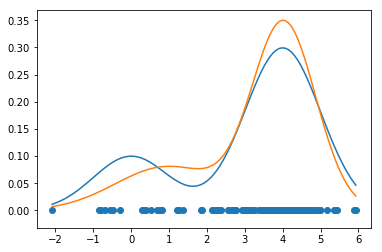

In [5]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt

def gauss_1D_pdf(x, mu,sig):
    return np.exp(-(x-mu)**2/(2*sig**2))/np.sqrt(2*np.pi*sig**2)

def two_gauss_mix_pdf(th):
    def f(x):
        return th[0] * gauss_1D_pdf(x, th[1], th[2]) + th[3] * gauss_1D_pdf(x, th[4], th[5])
    return f
    
def rand_two_gauss_mix(n, th):
    latent = rd.choice(2, n, p=th[[0,3]])
    x = rd.randn(n)
    return (1-latent)*(th[2]*x + th[1]) + latent*(th[5]*x + th[4])
    
def estep(x, th):
    comp_1_likelihoods = th[0] * gauss_1D_pdf(x, th[1], th[2])
    comp_2_likelihoods = th[3] * gauss_1D_pdf(x, th[4], th[5])
    normalizations = comp_1_likelihoods + comp_2_likelihoods
    cond_probs_1 = comp_1_likelihoods / normalizations
    cond_probs_2 = comp_2_likelihoods / normalizations
    return np.vstack([cond_probs_1, cond_probs_2])

def mstep(th, x, cond_probs):
    th_new = np.zeros(6)
    sum_cond_probs = np.sum(cond_probs, axis = 1)
    th_new[[0, 3]] = sum_cond_probs / x.size
    th_new[[1, 4]] = np.sum(cond_probs * x, axis = 1) / sum_cond_probs
    th_new[[2, 5]] = np.sqrt((np.sum(cond_probs * x**2, axis=1) / sum_cond_probs) - th_new[[1, 4]]**2)
    return th_new

rd.seed(1234)

theta_true = np.array([0.25, 0, 1, 0.75, 4, 1])

num_samples = 100

theta_init = [0.5, -1, 2, 0.5, 1, 2]
theta = theta_init
x = rand_two_gauss_mix(num_samples, theta_true)

plt.scatter(x, np.zeros(num_samples))
t = np.linspace(np.min(x), np.max(x), 100)
f = two_gauss_mix_pdf(theta_true)
plt.plot(t, f(t))

iters = 1000
for it in range(iters):
    f_est = two_gauss_mix_pdf(theta)
    
    cond_probs = estep(x, theta)
    #print(cond_probs)
    theta = mstep(theta, x, cond_probs)
    #print(theta)

plt.plot(t, f_est(t))
plt.show()




## Group Problems

1. Groups 1 and 2: Derive the EM steps for a mixture of thee Gaussians
2. Groups 3 and 4: Derive the EM steps for a mixture of two Gaussians in 2D
3. Groups 5 and 6: Derive the EM steps for a mixture of two Cauchy random variables: 
$$
p(X=x;\mu,\gamma) = \frac{1}{\pi\gamma\left(1+\left(\frac{(x-\mu)}{\gamma}\right)^2\right)}
$$
4. Groups 7 and 8: Derive the EM steps for approximating the joint probability table $P=(p_{i, j})\in M_{m, n}$ with $p_{i, j}\geq 0$ and $\sum_i\sum_j p_{i, j}=1$ using a latent mixture of two independent components: $\alpha_1 {\bf p}_1{\bf q}_1^T + \alpha_2 {\bf p}_2{\bf q}_2^T$ where $\alpha_i\in\mathbb{R}$, and ${\bf p}_i\in\mathbb{R}^m$, ${\bf q}_i\in\mathbb{R}^n$ for $i=1, 2$ are **probability vectors**. That is, they have non-negative entries and their entries sum to one.

## Reasons for using EM

1. Perform density estimation for detection/classification using Neymann-Pearson
2. Constructs a generative model that is useful for simulations